In [1]:
import tensorflow as tf

In [2]:
import numpy as np
import pandas as pd

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
import warnings
warnings.filterwarnings('ignore')

In [5]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [6]:
from sklearn.metrics import classification_report

In [7]:
df=pd.read_csv('mobile.csv')

In [8]:
pd.set_option('display.max_columns',None)

In [9]:
df.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,0
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,1
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,1
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,1
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,0


In [10]:
df.shape

(2000, 21)

In [11]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
battery_power    2000 non-null int64
blue             2000 non-null int64
clock_speed      2000 non-null float64
dual_sim         2000 non-null int64
fc               2000 non-null int64
four_g           2000 non-null int64
int_memory       2000 non-null int64
m_dep            2000 non-null float64
mobile_wt        2000 non-null int64
n_cores          2000 non-null int64
pc               2000 non-null int64
px_height        2000 non-null int64
px_width         2000 non-null int64
ram              2000 non-null int64
sc_h             2000 non-null int64
sc_w             2000 non-null int64
talk_time        2000 non-null int64
three_g          2000 non-null int64
touch_screen     2000 non-null int64
wifi             2000 non-null int64
price_range      2000 non-null int64
dtypes: float64(2), int64(19)
memory usage: 328.2 KB


In [13]:
df.isnull().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

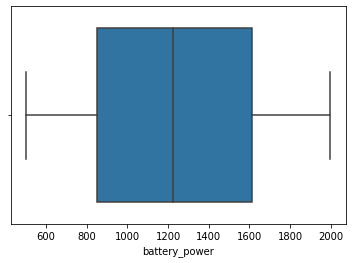

battery_power
-----------------------------------------------


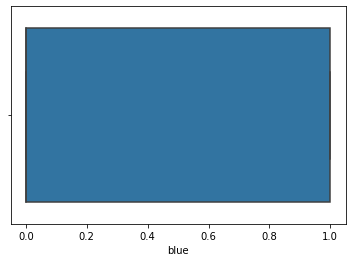

blue
-----------------------------------------------


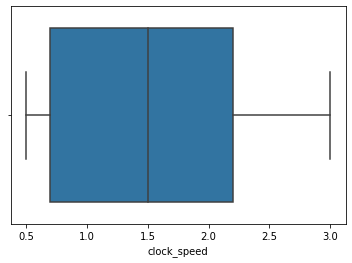

clock_speed
-----------------------------------------------


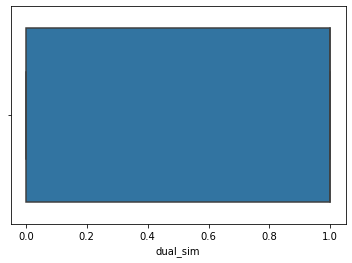

dual_sim
-----------------------------------------------


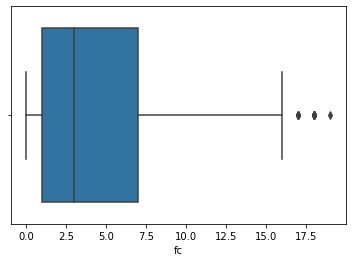

fc
-----------------------------------------------


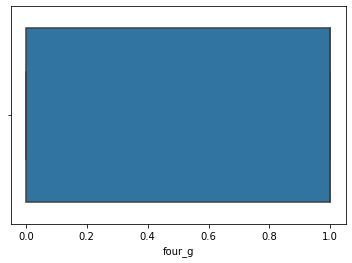

four_g
-----------------------------------------------


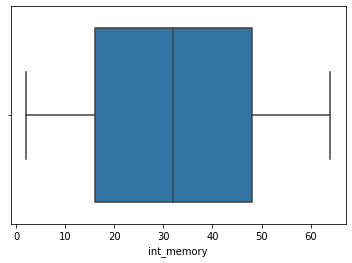

int_memory
-----------------------------------------------


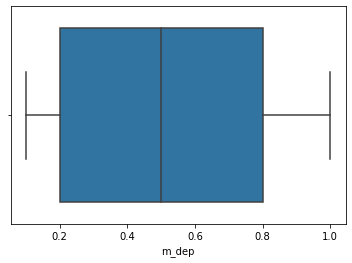

m_dep
-----------------------------------------------


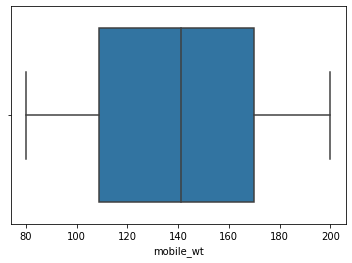

mobile_wt
-----------------------------------------------


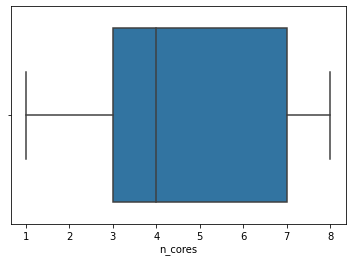

n_cores
-----------------------------------------------


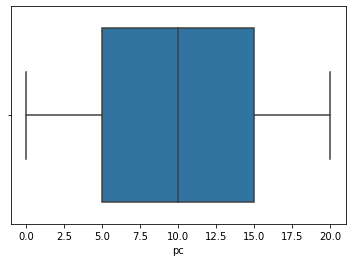

pc
-----------------------------------------------


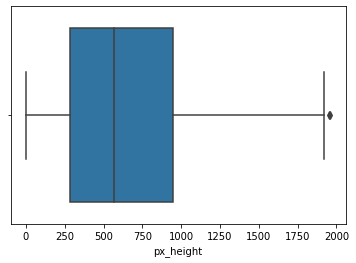

px_height
-----------------------------------------------


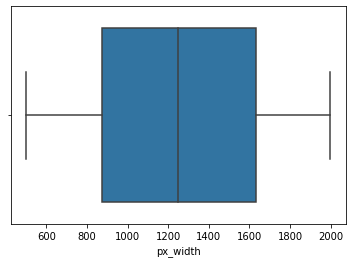

px_width
-----------------------------------------------


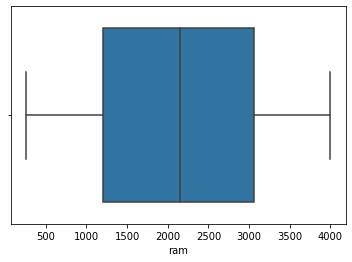

ram
-----------------------------------------------


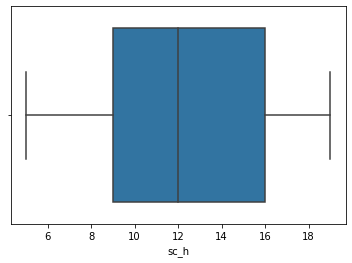

sc_h
-----------------------------------------------


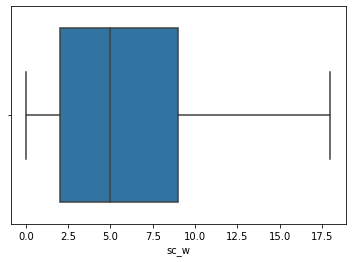

sc_w
-----------------------------------------------


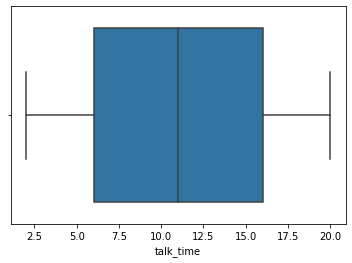

talk_time
-----------------------------------------------


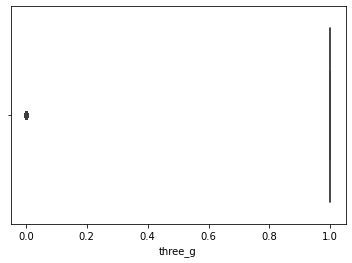

three_g
-----------------------------------------------


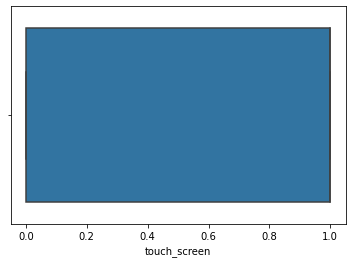

touch_screen
-----------------------------------------------


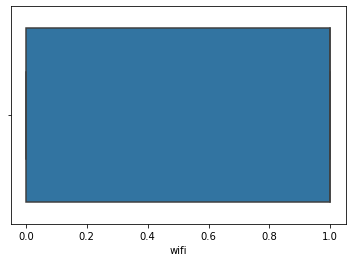

wifi
-----------------------------------------------


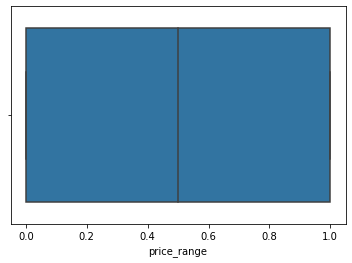

price_range
-----------------------------------------------


In [14]:
for col in df:
    plt.figure()
    sns.boxplot(df[col])
    plt.show()
    
    print(col)
    print("-----------------------------------------------")

In [15]:
s=df['fc']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [16]:
len(outliers)

18

In [17]:
a=list(outliers.keys())
a

[95,
 169,
 226,
 229,
 300,
 305,
 372,
 584,
 1387,
 1406,
 1416,
 1549,
 1554,
 1693,
 1705,
 1880,
 1882,
 1888]

In [18]:
df.drop(a,inplace=True)

In [19]:
s=df['px_height']
q1 = s.quantile(0.25)
q3 = s.quantile(0.75)
iqr = q3 - q1
iqr_lower = q1 - 1.5 * iqr
iqr_upper = q3 + 1.5 * iqr
outliers1=dict(s[(s < iqr_lower) | (s > iqr_upper)])

In [20]:
len(outliers1)

2

In [21]:
b=list(outliers1.keys())
b

[988, 1771]

In [22]:
df.drop(b,inplace=True)

In [23]:
df.shape

(1980, 21)

In [24]:
X=df.drop('price_range',axis=1)
Y=df['price_range']

In [25]:
X.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0


In [26]:
Y.head()

0    0
1    1
2    1
3    1
4    0
Name: price_range, dtype: int64

In [27]:
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.3,random_state=1)

In [28]:
ss=StandardScaler()

In [29]:
X_train_ss=ss.fit_transform(X_train)
X_test_ss=ss.transform(X_test)

In [30]:
model=tf.keras.Sequential([
    tf.keras.layers.Dense(2, activation="relu", input_shape=(X.shape[1],)),
    tf.keras.layers.Dense(3, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

In [31]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 42        
_________________________________________________________________
dense_1 (Dense)              (None, 3)                 9         
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 4         
Total params: 55
Trainable params: 55
Non-trainable params: 0
_________________________________________________________________


In [32]:
model.compile(optimizer='sgd',loss='binary_crossentropy')

In [33]:
trained_model=model.fit(X_train_ss,Y_train,epochs=50)

Epoch 1/50
44/44 [==============================] - 0s 5ms/step - loss: 0.7125
Epoch 2/50
44/44 [==============================] - 0s 5ms/step - loss: 0.6949
Epoch 3/50
44/44 [==============================] - 0s 4ms/step - loss: 0.6845
Epoch 4/50
44/44 [==============================] - 0s 4ms/step - loss: 0.6767
Epoch 5/50
44/44 [==============================] - 0s 4ms/step - loss: 0.6698
Epoch 6/50
44/44 [==============================] - 0s 4ms/step - loss: 0.6631
Epoch 7/50
44/44 [==============================] - 0s 4ms/step - loss: 0.6561
Epoch 8/50
44/44 [==============================] - 0s 4ms/step - loss: 0.6484
Epoch 9/50
44/44 [==============================] - 0s 4ms/step - loss: 0.6401
Epoch 10/50
44/44 [==============================] - 0s 4ms/step - loss: 0.6309
Epoch 11/50
44/44 [==============================] - 0s 4ms/step - loss: 0.6209
Epoch 12/50
44/44 [==============================] - 0s 4ms/step - loss: 0.6096
Epoch 13/50
44/44 [==============================

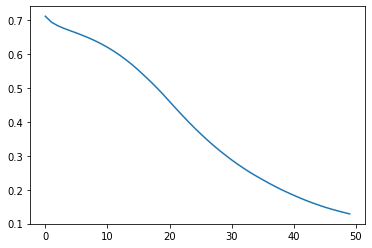

In [34]:
plt.plot(trained_model.history['loss'])

In [35]:
Y_pred=model.predict(X_test_ss)

In [36]:
Y_pred=np.where(Y_pred>0.5,1,0)

In [37]:
print(classification_report(Y_test,Y_pred))

              precision    recall  f1-score   support

           0       0.95      0.98      0.97       266
           1       0.98      0.96      0.97       328

    accuracy                           0.97       594
   macro avg       0.97      0.97      0.97       594
weighted avg       0.97      0.97      0.97       594

